In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/cour7816/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [138]:
#This dataset has 63 features - only add the columns that we are interested in 
data = pd.read_csv('./assets/Crashes.csv', usecols=['XCOORD', 'YCOORD', 'INTERSECTIONTYPE', 'ISWORKZONERELATED', 'FIRSTHARMFULEVENTSPECIFICS', 'LIGHTCONDITION', 'WEATHER', 'ISDRINKING', 'CYCLISTSINVOLVED', 'PEDESTRIANSINVOLVED', 'MINORINJURIES', 'MAJORINJURIES', 'FATALITIES'])

In [140]:
data.head()

,INTERSECTIONTYPE,ISWORKZONERELATED,FIRSTHARMFULEVENTSPECIFICS,LIGHTCONDITION,WEATHER,ISDRINKING,CYCLISTSINVOLVED,PEDESTRIANSINVOLVED,MINORINJURIES,MAJORINJURIES,FATALITIES,XCOORD,YCOORD
0,null,0,Parked Motor Vehicle,Dark- Lighted,Clear,No data provided,NaN,NaN,NaN,NaN,NaN,-76.931799,38.888110
1,null,0,Other Non-fixed Object,null,null,No data provided,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,null,0,Injury,null,null,No data provided,NaN,NaN,NaN,1.0,NaN,-76.973458,38.933115
3,null,0,Hit and Run,null,null,No data provided,NaN,NaN,NaN,NaN,NaN,-76.989447,38.927668
4,null,0,Other Non-fixed Object,Dark- Lighted,Clear,No data provided,NaN,NaN,NaN,NaN,NaN,-77.044894,38.906458


In [141]:
#fill NaN data with 0 
data.CYCLISTSINVOLVED.fillna(0, inplace=True)
data.PEDESTRIANSINVOLVED.fillna(0, inplace=True)
data.MINORINJURIES.fillna(0, inplace=True)
data.MAJORINJURIES.fillna(0, inplace=True)
data.FATALITIES.fillna(0, inplace=True)

In [142]:
#convert floats to ints to simplify 
data.CYCLISTSINVOLVED = data.CYCLISTSINVOLVED.astype(int)
data.PEDESTRIANSINVOLVED = data.PEDESTRIANSINVOLVED.astype(int)
data.MINORINJURIES = data.MINORINJURIES.astype(int)
data.MAJORINJURIES = data.MAJORINJURIES.astype(int)
data.FATALITIES = data.FATALITIES.astype(int)

In [143]:
data.head()

,INTERSECTIONTYPE,ISWORKZONERELATED,FIRSTHARMFULEVENTSPECIFICS,LIGHTCONDITION,WEATHER,ISDRINKING,CYCLISTSINVOLVED,PEDESTRIANSINVOLVED,MINORINJURIES,MAJORINJURIES,FATALITIES,XCOORD,YCOORD
0,null,0,Parked Motor Vehicle,Dark- Lighted,Clear,No data provided,0,0,0,0,0,-76.931799,38.888110
1,null,0,Other Non-fixed Object,null,null,No data provided,0,0,0,0,0,NaN,NaN
2,null,0,Injury,null,null,No data provided,0,0,0,1,0,-76.973458,38.933115
3,null,0,Hit and Run,null,null,No data provided,0,0,0,0,0,-76.989447,38.927668
4,null,0,Other Non-fixed Object,Dark- Lighted,Clear,No data provided,0,0,0,0,0,-77.044894,38.906458


In [144]:
#create dummy variables for FIRSTHARMFULEVENTSPECIFICS
event_dummies = pd.get_dummies(data.FIRSTHARMFULEVENTSPECIFICS, prefix='event')
event_dummies.head(1)

,event_Animal,event_Bridge Overhead Structure,event_Bridge Pier Or Support,event_Bridge Rail,event_Cable Barrier,event_Cargo/Equipment Loss Or Shift,event_Commercial Vehicle,event_Concrete Traffic Barrier,event_Culvert,event_Curb,...,event_Pedestrian,"event_Railway Vehicle (train, engine)","event_Struck By Falling, Shifting Cargo Or Anything Set In Motion By Motor Vehicle",event_Traffic Sign Support,event_Traffic Signal Support,event_Tree(standing),event_Unknown,event_Utility Pole/light Support,event_Work Zone/maintenance Equipment,event_null
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
#join the event dummy variables with the rest of the data, drop the first dummy 
data = data.join(event_dummies.ix[:, 'event_Bridge Overhead Structure':])

In [146]:
light_dummies = pd.get_dummies(data.LIGHTCONDITION, prefix='light')
light_dummies.head(1)

,light_Dark Unknown Lighted,light_Dark- Lighted,light_Dark- Not Lighted,light_Dawn,light_Daylight,light_Dusk,light_Other,light_Unknown,light_null
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
data = data.join(light_dummies.ix[:, 'light_Dark-Lighted':])

In [148]:
drinking_dummies = pd.get_dummies(data.ISDRINKING, prefix='drink')
drinking_dummies.head(1)

,drink_No,drink_No data provided,drink_Yes
0,0.0,1.0,0.0


In [149]:
data = data.join(drinking_dummies.ix[:, 'drink_No data provided':])

In [150]:
intersection_dummies = pd.get_dummies(data.INTERSECTIONTYPE, prefix='int')
intersection_dummies.head(1)

,"int_Five-Point, or More",int_Four-Way Intersection,int_L-Intersection,int_Not an Intersection,int_Roundabout,int_T-Intersection,int_Traffic Circle,int_Y-Intersection,int_null
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [151]:
data = data.join(intersection_dummies.ix[:, 'int_Four-Way Intersection':])


In [152]:
weather_dummies = pd.get_dummies(data.WEATHER, prefix='weather')
weather_dummies.head(1)

,"weather_Blowing Sand, Soil, Dirt",weather_Blowing Snow,weather_Clear,weather_Cloudy,"weather_Fog, Smog, Smoke",weather_Freezing Rain Or Freezing Drizzle,weather_Mist,weather_Other,weather_Rain,weather_Severe Crosswinds,weather_Sleet Or Hail,weather_Snow,weather_Unknown,weather_null
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
data = data.join(weather_dummies.ix[:, 'weather_Blowing Sand Soil, Dirt':])
data.head()

,INTERSECTIONTYPE,ISWORKZONERELATED,FIRSTHARMFULEVENTSPECIFICS,LIGHTCONDITION,WEATHER,ISDRINKING,CYCLISTSINVOLVED,PEDESTRIANSINVOLVED,MINORINJURIES,MAJORINJURIES,...,"weather_Fog, Smog, Smoke",weather_Freezing Rain Or Freezing Drizzle,weather_Mist,weather_Other,weather_Rain,weather_Severe Crosswinds,weather_Sleet Or Hail,weather_Snow,weather_Unknown,weather_null
0,null,0,Parked Motor Vehicle,Dark- Lighted,Clear,No data provided,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,null,0,Other Non-fixed Object,null,null,No data provided,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,null,0,Injury,null,null,No data provided,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,null,0,Hit and Run,null,null,No data provided,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,null,0,Other Non-fixed Object,Dark- Lighted,Clear,No data provided,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [154]:
#drop data that is null or unknown, drop non-dummied variables
data = data.drop(['FIRSTHARMFULEVENTSPECIFICS', 'ISDRINKING', 'INTERSECTIONTYPE', 'WEATHER', 'LIGHTCONDITION', 'event_Unknown', 'event_null', 'light_null', 'drink_No data provided','int_null', 'weather_null', 'weather_Other', 'weather_Unknown'], 1)

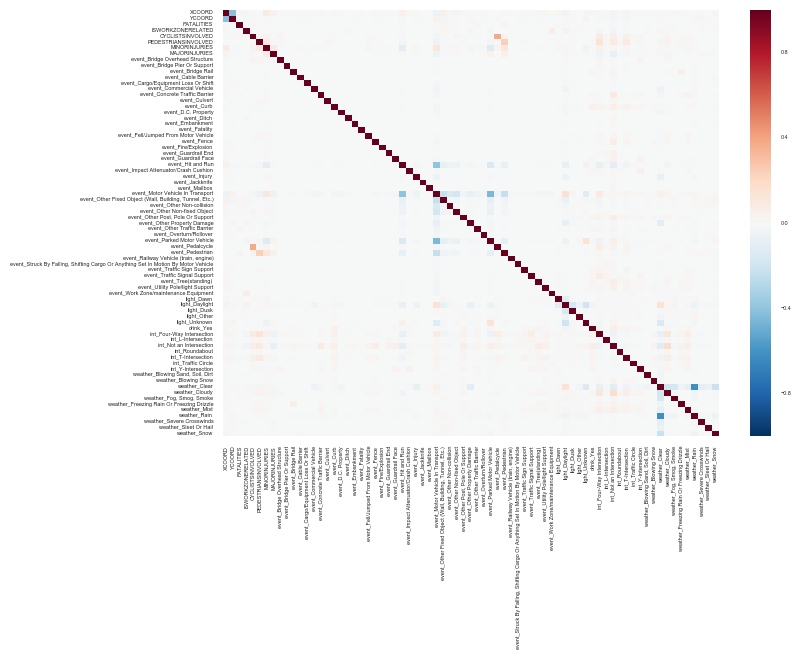

In [184]:
#set font scale to see all labels
sns.set(font_scale=0.4)
#create correlation matrix 
corr = data.corr()
#create heatmap of the correlation matrix
sns.heatmap(corr)


From the heatmap we can see that `event_Pedalcycle` and `PEDESTRIANSINVOLVED`, and `event_Pedestrian` and `PEDESTRIANSINVOLVED` have higher correlations, which makes sense. We can also see that `event_Motor Vehicle in Transport` has a lower correlation with `event_Hit and Run` and `event_Parked Motore Vehicle`.  `weather_Rain` and `weather_Clear` have a low correlation as well. 

In [160]:
#reorder the dataset - put XCOORD, YCOORD, and FATALITIES at the beginning of the dataframe 
XCOORD = data.XCOORD
YCOORD = data.YCOORD
FATALITIES = data.FATALITIES 
data.drop(labels=['XCOORD', 'YCOORD', 'FATALITIES'], axis=1, inplace=True)

data.insert(0, 'FATALITIES', FATALITIES)
data.insert(0, 'YCOORD', YCOORD)
data.insert(0, 'XCOORD', XCOORD)

In [180]:
#calculate correlation between all variables (except the coordinates) and FATALITIES 
fatalities_corrs = [data[data.columns[3:]].apply(lambda x: x.corr(data['FATALITIES']))]
pd.set_option('max_rows', 100)
fatalities_corrs

[ISWORKZONERELATED                                                                     0.003163
 CYCLISTSINVOLVED                                                                      0.008617
 PEDESTRIANSINVOLVED                                                                  -0.000319
 MINORINJURIES                                                                         0.004555
 MAJORINJURIES                                                                        -0.002687
 event_Bridge Overhead Structure                                                      -0.000264
 event_Bridge Pier Or Support                                                         -0.000305
 event_Bridge Rail                                                                    -0.000417
 event_Cable Barrier                                                                  -0.000187
 event_Cargo/Equipment Loss Or Shift                                                   0.006672
 event_Commercial Vehicle               

From the above list, we can see that the calculated correlations between all variables and `FATALITIES` is very slight, with the only correlation being outside of -0.016 and 0.016 is `event_Pedestrian`, at 0.03.